# 課程目標:
了解Keras 內建dataset 如何使用 <br />
## 範例重點
使用CIFAR10 練習如何分類, 架構網路層 <br />
<br />
如何對數據及進行查詢<br />
<br />
## 導入必要的程式庫

In [1]:
import numpy as np
from keras.datasets import cifar10
np.random.seed(10)

Using TensorFlow backend.


## 資料準備

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(f' train : {len(x_train)}')
print(f' test : {len(x_test)}')

 train : 50000
 test : 10000


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

In [8]:
label_dict = { 0 : 'airplace', 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : 'deer' ,
                 5 : 'dog', 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}

In [9]:
import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25 : num = 25
    for i in range(0,num) :
        ax = plt.subplot(5,5, i+1)
        ax.imshow(images[idx], cmap = 'binary')
        title = str(i) + ',' + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += '=>' + label_dict[prediction[i]]
        
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

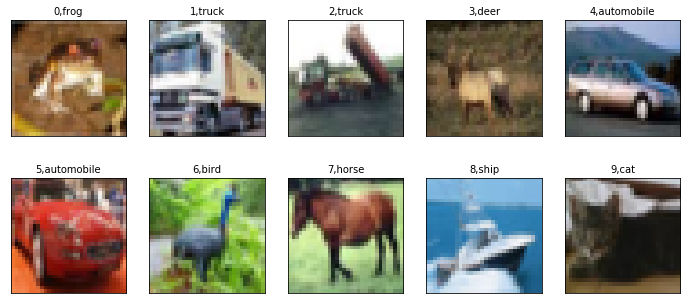

In [10]:
plot_images_labels_prediction(x_train, y_train, [] , 0)

In [11]:
print(f' x_test : {x_test.shape}')
print(f' y_test : {y_test.shape}')

 x_test : (10000, 32, 32, 3)
 y_test : (10000, 1)


# 影像正規化

In [12]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [13]:
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = y_test.astype('float32') / 255.0

In [14]:
x_train_normalized[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

# 轉換label 為OneHot Encoding

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [18]:
y_train_onehot.shape

(50000, 10)

In [19]:
y_train_onehot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# 作業目標:
使用CIFAR100, 數據集變大的影響 <br />
# 作業重點:¶
了解 CIFAR100 跟 CIFAR10 數據及差異<br />

In [20]:
from keras.datasets import cifar100
np.random.seed(100)

## 資料準備
## Image normalize
## 轉換label 為OneHot Encoding

In [23]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode = 'fine')

In [24]:
print(f' trian_size : {x_train.shape} ')
print(f' test_size : {x_test.shape} ')
print(f' train_label_size : {y_train.shape}')
print(f' test_label_size : {y_test.shape}')

 trian_size : (50000, 32, 32, 3) 
 test_size : (10000, 32, 32, 3) 
 train_label_size : (50000, 1)
 test_label_size : (10000, 1)


In [31]:
fine_labels = [
'apple', # id 0
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

mapping = {
'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
'household electrical device': ['clock', 'computer_keyboard', 'lamp', 'telephone', 'television'],
'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
'people': ['baby', 'boy', 'girl', 'man', 'woman'],
'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

In [40]:
def plot_images_labels_prediction_100(images, labels, prediction, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25 : num = 25
    for i in range(0,num) :
        ax = plt.subplot(5,5, i+1)
        ax.imshow(images[idx], cmap = 'binary')
        title = str(i) + ',' + fine_labels[labels[i][0]]
        if len(prediction) > 0:
            title += '=>' + fine_labels[prediction[i]]
        
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

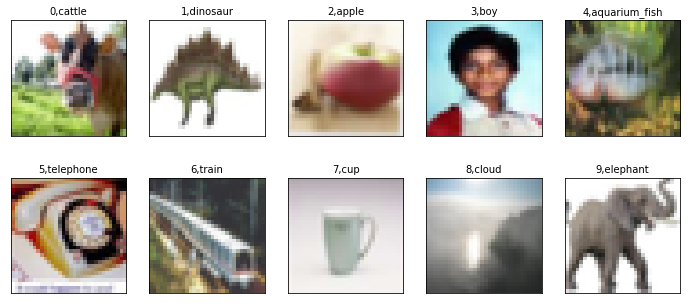

In [41]:
plot_images_labels_prediction_100(x_train, y_train, [], 0)

In [43]:
x_train[0][0][:5]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [44]:
x_train = x_train.astype('float64') / 255.0
x_test = x_test.astype('float64') / 255.0

x_train[0][0][:5]

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [45]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [46]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [48]:
y_train_onehot.shape

(50000, 100)

In [49]:
y_train_onehot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.